In [11]:

## **Week 1 Client Project: Basic Data Processing Script**
# **Objective:** Create a script for calculating the average temperature from a list of daily temperatures.

# Week 1: Basic Data Processing Script
# Calculate average temperature and identify high/low

def analyze_temperatures(temp_list):
    """
    Analyzes a list of temperatures.
    Calculates average, max, and min.
    Args:
        temp_list (list): List of daily temperatures.
    Returns:
        dict: A dictionary containing average, max, and min temperatures.
    """
    if not temp_list:
        return None

    avg_temp = sum(temp_list) / len(temp_list)
    max_temp = max(temp_list)
    min_temp = min(temp_list)

    return {
        'average_temperature': round(avg_temp, 2),
        'max_temperature': max_temp,
        'min_temperature': min_temp
    }

# Example usage with sample data
weekly_temps = [22, 24, 19, 23, 25, 27, 21]
results = analyze_temperatures(weekly_temps)

print("Week 1 Client Project: Temperature Analysis")
print(f"Daily Temperatures: {weekly_temps}")
print(f"Average Temperature: {results['average_temperature']}°C")
print(f"Highest Temperature: {results['max_temperature']}°C")
print(f"Lowest Temperature: {results['min_temperature']}°C")

Week 1 Client Project: Temperature Analysis
Daily Temperatures: [22, 24, 19, 23, 25, 27, 21]
Average Temperature: 23.0°C
Highest Temperature: 27°C
Lowest Temperature: 19°C


In [12]:

## **Week 2 Client Project: Data Cleaning Script**
# **Objective:** Write a script for data cleaning (remove duplicates, filter data).

# Week 2: Data Cleaning Script

# Sample data: List of dictionaries representing user data
raw_data = [
    {'name': 'Alice', 'city': 'Tokyo', 'score': 85},
    {'name': 'Bob', 'city': 'New York', 'score': 92},
    {'name': 'Alice', 'city': 'Tokyo', 'score': 85},  # Duplicate
    {'name': 'Charlie', 'city': 'London', 'score': 78},
    {'name': 'Diana', 'city': 'Tokyo', 'score': 88},
    {'name': 'Evan', 'city': 'New York', 'score': 95},
    {'name': 'Frank', 'city': '', 'score': 72},        # Missing city
    {'name': 'Grace', 'city': 'London', 'score': None} # Missing score
]

def clean_data(data, city_filter=None, min_score=0):
    """
    Cleans a dataset by removing duplicates, entries with missing critical fields, and filtering.
    Args:
        data (list of dicts): The raw data to clean.
        city_filter (str, optional): If provided, only keep records for this city. Defaults to None.
        min_score (int, optional): Minimum score to keep. Defaults to 0.
    Returns:
        list of dicts: The cleaned data.
    """
    # Step 1: Remove duplicates
    # Convert each dictionary to a tuple of items to make it hashable, then use set to remove duplicates
    unique_data = [dict(t) for t in {tuple(d.items()) for d in data}]

    # Step 2: Remove entries with missing critical data (empty city or None score)
    cleaned_data = [
        record for record in unique_data
        if record.get('city') and record.get('score') is not None
    ]

    # Step 3: Filter by city if specified
    if city_filter:
        cleaned_data = [record for record in cleaned_data if record['city'] == city_filter]

    # Step 4: Filter by minimum score
    cleaned_data = [record for record in cleaned_data if record['score'] >= min_score]

    return cleaned_data

# Example usage
print("\nWeek 2 Client Project: Data Cleaning")
print("Original Data:")
for entry in raw_data:
    print(entry)

cleaned_records = clean_data(raw_data, city_filter='Tokyo', min_score=80)

print("\nCleaned Data (Unique records, from Tokyo, score >= 80):")
for entry in cleaned_records:
    print(entry)


Week 2 Client Project: Data Cleaning
Original Data:
{'name': 'Alice', 'city': 'Tokyo', 'score': 85}
{'name': 'Bob', 'city': 'New York', 'score': 92}
{'name': 'Alice', 'city': 'Tokyo', 'score': 85}
{'name': 'Charlie', 'city': 'London', 'score': 78}
{'name': 'Diana', 'city': 'Tokyo', 'score': 88}
{'name': 'Evan', 'city': 'New York', 'score': 95}
{'name': 'Frank', 'city': '', 'score': 72}
{'name': 'Grace', 'city': 'London', 'score': None}

Cleaned Data (Unique records, from Tokyo, score >= 80):
{'name': 'Diana', 'city': 'Tokyo', 'score': 88}
{'name': 'Alice', 'city': 'Tokyo', 'score': 85}


In [13]:

## **Week 3 Client Project: Data Cleaning and Aggregation with Pandas**
# **Objective:** Clean and aggregate a dataset (remove missing values, calculate averages).

# Week 3: Data Cleaning and Aggregation with Pandas
import pandas as pd
import numpy as np

# Create a sample sales dataset
data = {
    'Region': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West', 'North', 'South'],
    'Product': ['WidgetA', 'WidgetB', 'WidgetA', 'WidgetB', 'WidgetA', 'WidgetB', 'WidgetA', 'WidgetB', 'WidgetA', 'WidgetB'],
    'Sales': [100, 150, np.nan, 200, 125, 175, 90, 160, 110, 190], # One missing value
    'Cost': [50, 70, 60, 90, 55, 80, 45, 75, 52, 85]
}

df_sales = pd.DataFrame(data)
print("Week 3 Client Project: Sales Data Aggregation")
print("Original DataFrame:")
print(df_sales)
print("\nDataset Info:")
df_sales.info()

# Step 1: Clean the data - remove rows where 'Sales' is missing (NaN)
df_cleaned = df_sales.dropna(subset=['Sales'])
print(f"\nRemoved {len(df_sales) - len(df_cleaned)} row(s) with missing Sales data.")
print("\nCleaned DataFrame:")
print(df_cleaned)

# Step 2: Aggregate data - Calculate total and average sales by Region and Product
df_grouped = df_cleaned.groupby(['Region', 'Product']).agg(
    Total_Sales=('Sales', 'sum'),
    Average_Sales=('Sales', 'mean'),
    Total_Cost=('Cost', 'sum')
).round(2).reset_index() # reset_index() makes Region and Product regular columns again

print("\nAggregated Sales Data (Total and Average by Region & Product):")
print(df_grouped)

# Additional useful analysis: Calculate overall profit margin
df_grouped['Total_Profit'] = df_grouped['Total_Sales'] - df_grouped['Total_Cost']
df_grouped['Profit_Margin'] = (df_grouped['Total_Profit'] / df_grouped['Total_Sales'] * 100).round(2)
print("\nAggregated Data with Profit Analysis:")
print(df_grouped)

Week 3 Client Project: Sales Data Aggregation
Original DataFrame:
  Region  Product  Sales  Cost
0  North  WidgetA  100.0    50
1  North  WidgetB  150.0    70
2  South  WidgetA    NaN    60
3  South  WidgetB  200.0    90
4   East  WidgetA  125.0    55
5   East  WidgetB  175.0    80
6   West  WidgetA   90.0    45
7   West  WidgetB  160.0    75
8  North  WidgetA  110.0    52
9  South  WidgetB  190.0    85

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Region   10 non-null     object 
 1   Product  10 non-null     object 
 2   Sales    9 non-null      float64
 3   Cost     10 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 452.0+ bytes

Removed 1 row(s) with missing Sales data.

Cleaned DataFrame:
  Region  Product  Sales  Cost
0  North  WidgetA  100.0    50
1  North  WidgetB  150.0    70
3  South  WidgetB  200.0  

Week 4 Client Project: Iris Dataset Visualization Dashboard
First 5 rows of the Iris dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Basic Statistics:
       sepal_length  sepal

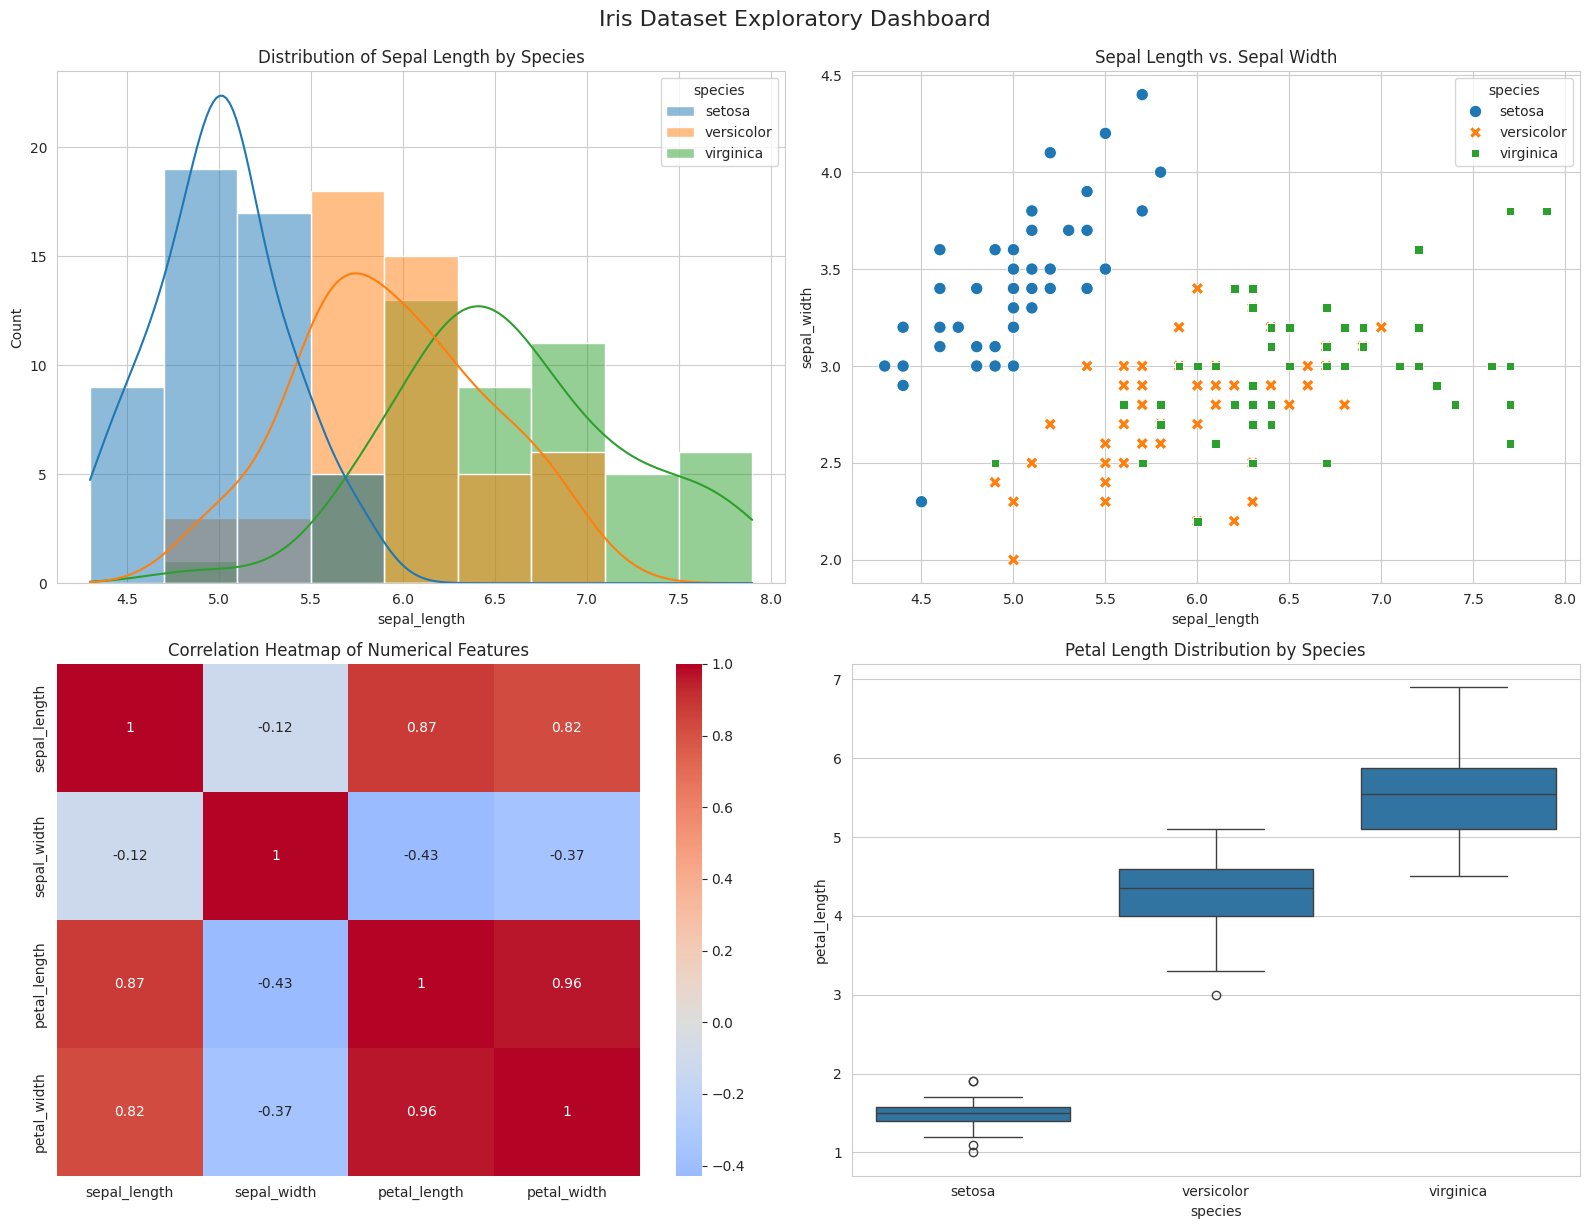


Generating Pairplot (this may take a moment and appears separately)...


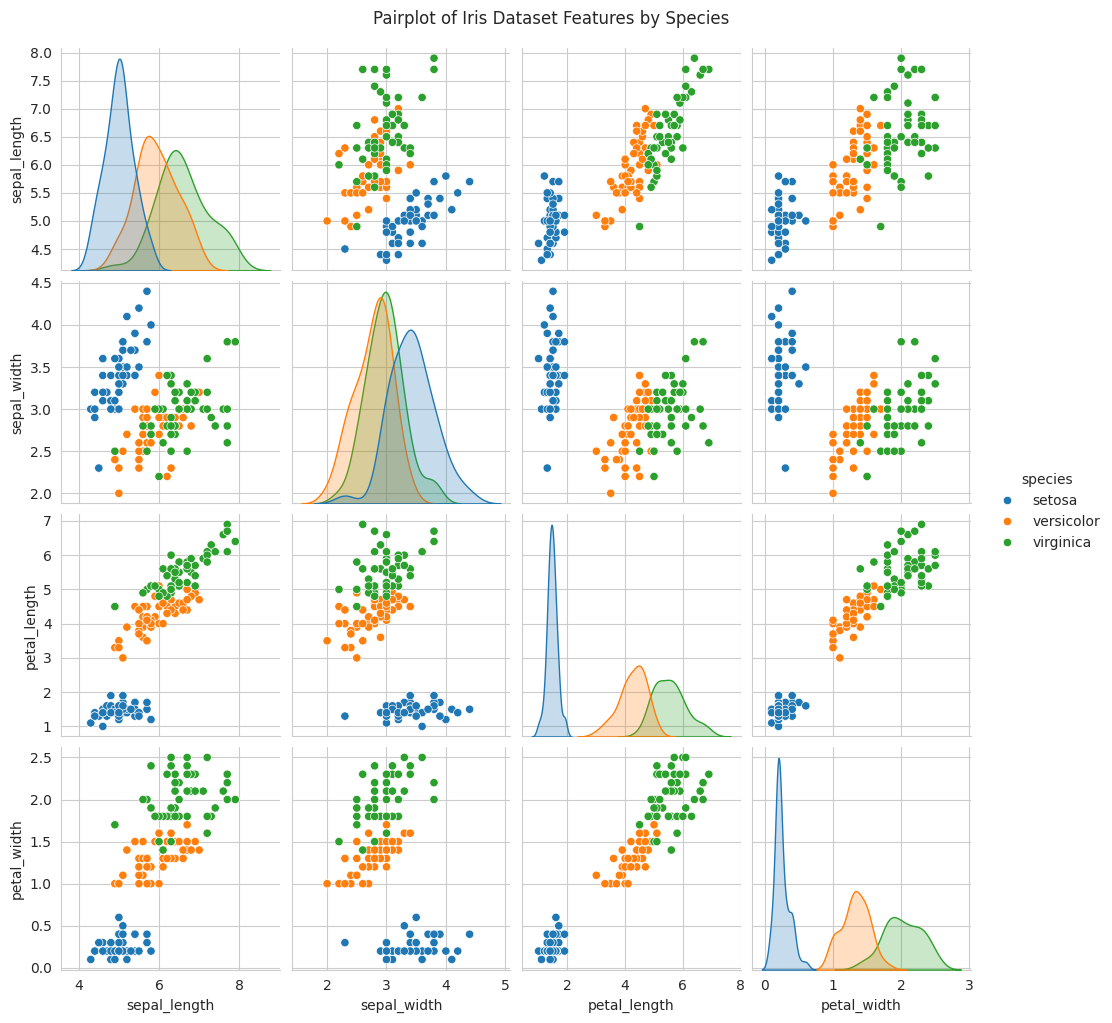

In [14]:

## **Week 4 Client Project: Data Visualization Dashboard**
# **Objective:** Create a dashboard for visualizing relationships between features in a dataset.

# Week 4: Data Visualization Dashboard
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the famous Iris dataset (built into Seaborn for demonstration)
iris_df = sns.load_dataset('iris')
print("Week 4 Client Project: Iris Dataset Visualization Dashboard")
print("First 5 rows of the Iris dataset:")
print(iris_df.head())
print("\nDataset Info:")
print(iris_df.info())
print("\nBasic Statistics:")
print(iris_df.describe())
print("\nSpecies count:")
print(iris_df['species'].value_counts())

# Set the visual style
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

# 1. Histogram: Distribution of sepal length
plt.subplot(2, 2, 1) # (rows, columns, index)
sns.histplot(data=iris_df, x='sepal_length', hue='species', kde=True)
plt.title('Distribution of Sepal Length by Species')

# 2. Scatter Plot: Sepal Length vs Sepal Width, colored by species
plt.subplot(2, 2, 2)
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='species', style='species', s=80)
plt.title('Sepal Length vs. Sepal Width')

# 3. Correlation Heatmap of all numerical features
plt.subplot(2, 2, 3)
# Calculate correlation matrix
numeric_df = iris_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')

# 4. Pairplot for high-level overview (this creates its own figure, so we use a different approach)
# We'll create a boxplot for this slot to show another useful visualization
plt.subplot(2, 2, 4)
sns.boxplot(data=iris_df, x='species', y='petal_length')
plt.title('Petal Length Distribution by Species')

plt.tight_layout() # Adjusts spacing between plots to avoid overlap
plt.suptitle('Iris Dataset Exploratory Dashboard', fontsize=16, y=1.02)
plt.show()

# Since Pairplot creates a separate figure, we generate it after the main dashboard
print("\nGenerating Pairplot (this may take a moment and appears separately)...")
sns.pairplot(iris_df, hue='species', diag_kind='kde', corner=False)
plt.suptitle('Pairplot of Iris Dataset Features by Species', y=1.02)
plt.show()

## **Summary**

This notebook demonstrates the practical application of Python for data science tasks across four weeks:
1.  **Week 1:** Core Python for basic data processing.
2.  **Week 2:** Python data structures and functions for data cleaning.
3.  **Week 3:** Using Pandas for efficient data manipulation and aggregation.
4.  **Week 4:** Using Matplotlib and Seaborn for exploratory data visualization.
